# Описание данных
Таблица `users` (информация о пользователях):
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

Таблица `calls` (информация о звонках):
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

Таблица `messages` (информация о сообщениях):
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

Таблица `internet` (информация об интернет-сессиях):
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

Таблица `tariffs` (информация о тарифах):
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)


# Определение перспективного тарифа для телеком-компании
Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

# Описание тарифов
`Тариф «Смарт»`
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
    - минута разговора: 3 рубля
    - сообщение: 3 рубля
    - 1 Гб интернет-трафика: 200 рублей
    
`Тариф «Ультра»`
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
    - минута разговора: 1 рубль
    - сообщение: 1 рубль
    - 1 Гб интернет-трафика: 150 рублей
    
### Примечание
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.

Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта. Примите, что неиспользованные за предыдущий месяц звонки, смс, интернет на следующий месяц не переносятся.

# Инструкция по выполнению проекта
## Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
# Импортируем библеотеки брата и его старшего брата.
import pandas as pd
import numpy as np
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt

In [2]:
server_path_users = '/datasets/users.csv'
local_path_users = '/Users/mmaximmaximovgmail.com/Desktop/DS/Project_4/users.csv'
try:
    data_users = pd.read_csv(server_path_users)
except:
    data_users = pd.read_csv(local_path_users)
    
server_path_tariffs = '/datasets/tariffs.csv'
local_path_tariffs = '/Users/mmaximmaximovgmail.com/Desktop/DS/Project_4/tariffs.csv'
try:
    data_tariffs = pd.read_csv(server_path_tariffs)
except:
    data_tariffs = pd.read_csv(local_path_tariffs)

server_path_messages = '/datasets/messages.csv'
local_path_messages = '/Users/mmaximmaximovgmail.com/Desktop/DS/Project_4/messages.csv'
try:
    data_messages = pd.read_csv(server_path_messages)
except:
    data_messages = pd.read_csv(local_path_messages)
    
server_path_internet = '/datasets/internet.csv'
local_path_internet = '/Users/mmaximmaximovgmail.com/Desktop/DS/Project_4/internet.csv'
try:
    data_internet = pd.read_csv(server_path_internet, index_col=0)
except:
    data_internet = pd.read_csv(local_path_internet, index_col=0)
    
server_path_calls = '/datasets/calls.csv'
local_path_calls = '/Users/mmaximmaximovgmail.com/Desktop/DS/Project_4/calls.csv'
try:
    data_calls = pd.read_csv(server_path_calls)
except:
    data_calls = pd.read_csv(local_path_calls)

    Выводим первые 5 строк из каждого файла и информацию.

In [3]:
data_users.head(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [4]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [5]:
data_users.isnull().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

In [6]:
data_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [7]:
data_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [8]:
data_tariffs.isnull().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

In [9]:
data_messages.head(5)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [10]:
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [11]:
data_messages.isnull().sum()

id              0
message_date    0
user_id         0
dtype: int64

In [12]:
data_internet.head(5)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [13]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [14]:
data_internet.isnull().sum()

id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In [15]:
data_calls.head(5)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [16]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [17]:
data_calls.isnull().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

### Первичный вывод, после просмотра данных.
- Видим, что практически нигде нету пропущенных значений, кроме `churn_date`, но и то, это дата когда человек перестал пользоваться тарифом.
- В общих чертах, должен поправить типы в тех столбцах которых нужно, подправить дату, добавить отдельные столбцы по каждой таблице, т.к нужен ежемесечяные данные

## Шаг 2. Подготовьте данные
### 2.1 Доработка ошибок в данных 
- Приведите данные к нужным типам;
- Найдите и исправьте ошибки в данных, если они есть.

    Поясните, какие ошибки вы нашли и как их исправили. В данных вы найдёте звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.

### Работаем с `data_users`

In [18]:
# Меняю тип для столбца reg_date/churn_date и привожу его порядок.
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format=('%Y-%m-%d'))
data_users['churn_date'] = pd.to_datetime(data_users['churn_date'], format=('%Y-%m-%d'))
# Переименуем столбец tariff на tariff_name, чтобы смогли обьединить две таблицы командой merge()
data_users = data_users.rename(columns = {'tariff':'tariff_name'})

### Работаем с `data_tariffs`

In [19]:
# Без изменений
data_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


# Работаем с `data_messages`

In [20]:
# Тоже меняем тип на правильный
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format=('%Y-%m-%d'))

In [21]:
# Добавляем столбцем с месяцами отправленных сообщений для задачи 2.2
data_messages['month'] = data_messages['message_date'].dt.month

In [22]:
data_messages['month'].describe()

count    123036.000000
mean          8.632262
std           2.747328
min           1.000000
25%           7.000000
50%           9.000000
75%          11.000000
max          12.000000
Name: month, dtype: float64

### Работаем с `data_internet`

In [23]:
# Меняем тип для столбца session_date
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format=('%Y-%m-%d'))

In [24]:
# Создаме столбцем в таблице data_internet для дальнейшего анализа
data_internet['month'] = data_internet['session_date'].dt.month

In [25]:
data_internet['month'].describe()

count    149396.000000
mean          8.563315
std           2.788717
min           1.000000
25%           7.000000
50%           9.000000
75%          11.000000
max          12.000000
Name: month, dtype: float64

In [26]:
# Закоментировал 
#data_internet['mb_used'] = np.ceil(data_internet['mb_used'])

### Работаем с `data_calls`

In [27]:
# Меняем тип столбца call_date
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format=('%Y-%m-%d'))

In [28]:
# Добавляем столбец call_month в таблицу data_calls, для дальнейшего анализа. 
data_calls['month'] = data_calls['call_date'].dt.month

In [29]:
data_calls['month'].describe()

count    202607.000000
mean          8.574067
std           2.787093
min           1.000000
25%           7.000000
50%           9.000000
75%          11.000000
max          12.000000
Name: month, dtype: float64

In [30]:
# Округляем длительность звонков до большего числа
data_calls['duration'] = np.ceil(data_calls['duration'])

### 2.2 Посчитайте для каждого пользователя: 
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

## Соединяем столбцы отпрвленные сообщение, кол-во звонков и их кол-во минут

In [31]:
#группируем исходные датасеты по двум столбцам
#считаем суммарный объем услуг каждого пользователя в каждый месяц
#сразу переименывовыем столбцы (как они у тебя записаны), так что бы дальнейший код работал

sum_calls = data_calls.pivot_table(
    index=['user_id', 'month'], values='duration', aggfunc= ['count', 'sum'])
sum_calls.columns = ['calls', 'minutes']

sum_messages = data_messages.pivot_table(
    index=['user_id', 'month'], values='id', aggfunc='count')
sum_messages.columns = ['messages']

sum_internet = data_internet.pivot_table(
    index=['user_id', 'month'], values='mb_used', aggfunc='sum')
sum_internet.columns = ['tariffs']

#объединяем полученные датасеты методом по индексам,
#с параметром `how = 'outer'` — что бы все данные вошли в объединенный датасет

final_table = sum_calls.join(sum_messages, how = 'outer')
final_table = final_table.join(sum_internet, how = 'outer')

#сбрасываем индексы, что бы `user_id` и `month` стали столбцами

final_table = final_table.reset_index()

#Объединяем с информацией по пользователям и тарифам

final_table = final_table.merge(data_users, on = 'user_id', how = 'outer')
final_table = final_table.merge(data_tariffs, on = 'tariff_name', how = 'outer')

#выполняем проверки

print('Количество строк в таблице:', len(final_table))

print('Внешний вид таблицы:')
display(final_table.head())

print('Суммарный объем услуг:')
display(final_table[['minutes','messages','tariffs']].sum())

print('Количество уникальных пользователей:',final_table['user_id'].nunique())

Количество строк в таблице: 3216
Внешний вид таблицы:


,user_id,month,calls,minutes,messages,tariffs,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,22.0,159.0,22.0,2253.49,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6.0,43.0,172.0,60.0,23233.77,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7.0,47.0,340.0,75.0,14003.64,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8.0,52.0,408.0,81.0,14055.93,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9.0,58.0,466.0,57.0,14568.91,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


Суммарный объем услуг:


minutes      1450301.00
messages      123036.00
tariffs     55305267.73
dtype: float64

Количество уникальных пользователей: 500


In [32]:
# Смотрю на пропуски в столбцах
final_table.isnull().sum()

user_id                     0
month                       2
calls                      42
minutes                    42
messages                  499
tariffs                    13
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff_name                 0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

Видим, что в столбцах messages и tariffs имеются пропуска, возможно они там появились потомучто клиент совсем не отправлял смс и не пользовались своим интернетом, причина у всех индвидуальная. Поэтому заменим все пропуска в этих таблицах на 0.

In [33]:
final_table['calls'] = final_table['calls'].fillna(0)
final_table['minutes'] = final_table['minutes'].fillna(0)
final_table['messages'] = final_table['messages'].fillna(0)
final_table['tariffs'] = final_table['tariffs'].fillna(0)
# Теперь все чисто.
final_table.isnull().sum()

user_id                     0
month                       2
calls                       0
minutes                     0
messages                    0
tariffs                     0
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff_name                 0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

In [34]:
# Преобразуем таблицу и высчитаем выручку по кол-ву звонкам, сообщениям, интенет трафику
final_table.reset_index(inplace=True)
final_table['earn_calls'] = ((final_table['minutes'] - final_table['minutes_included'])*final_table['rub_per_minute'])
final_table['earn_messages'] = ((final_table['messages'] - final_table['messages_included'])*final_table['rub_per_message'])
final_table['earn_tariffs'] = ((final_table['tariffs'] - final_table['mb_per_month_included'])/1024)
final_table['earn_tariffs'] = np.ceil(final_table['earn_tariffs'])
final_table['earn_tariffs'] = final_table['earn_tariffs'] * final_table['rub_per_gb']
final_table.head()


,index,user_id,month,calls,minutes,messages,tariffs,age,churn_date,city,...,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,earn_calls,earn_messages,earn_tariffs
0,0,1000,5.0,22.0,159.0,22.0,2253.49,52,NaT,Краснодар,...,1000,30720,3000,1950,150,1,1,-2841.0,-978.0,-4050.0
1,1,1000,6.0,43.0,172.0,60.0,23233.77,52,NaT,Краснодар,...,1000,30720,3000,1950,150,1,1,-2828.0,-940.0,-1050.0
2,2,1000,7.0,47.0,340.0,75.0,14003.64,52,NaT,Краснодар,...,1000,30720,3000,1950,150,1,1,-2660.0,-925.0,-2400.0
3,3,1000,8.0,52.0,408.0,81.0,14055.93,52,NaT,Краснодар,...,1000,30720,3000,1950,150,1,1,-2592.0,-919.0,-2400.0
4,4,1000,9.0,58.0,466.0,57.0,14568.91,52,NaT,Краснодар,...,1000,30720,3000,1950,150,1,1,-2534.0,-943.0,-2250.0


In [35]:
# Минус нам говорит о том, что пользователь не полностью использовал пакет тарифа, а положительные означает,
# что нужно считать для них сверх тариф, но сначала я уберу все отрицательные значения заменю на 0
# С помощью функции .clip(lower=0) мы сможем установить порог на те значения что меньше нуля, т.е отрицательные
final_table['earn_calls'] = final_table['earn_calls'].clip(lower=0)
final_table['earn_messages'] = final_table['earn_messages'].clip(lower=0)
final_table['earn_tariffs'] = final_table['earn_tariffs'].clip(lower=0)
# Округляем в большую сторону
final_table['earn_tariffs'] = np.ceil(final_table['earn_tariffs'])
final_table['earn_calls'] = np.ceil(final_table['earn_calls'])
final_table

,index,user_id,month,calls,minutes,messages,tariffs,age,churn_date,city,...,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,earn_calls,earn_messages,earn_tariffs
0,0,1000,5.0,22.0,159.0,22.0,2253.49,52,NaT,Краснодар,...,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
1,1,1000,6.0,43.0,172.0,60.0,23233.77,52,NaT,Краснодар,...,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
2,2,1000,7.0,47.0,340.0,75.0,14003.64,52,NaT,Краснодар,...,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
3,3,1000,8.0,52.0,408.0,81.0,14055.93,52,NaT,Краснодар,...,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
4,4,1000,9.0,58.0,466.0,57.0,14568.91,52,NaT,Краснодар,...,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,3211,1499,9.0,9.0,70.0,11.0,1845.75,35,NaT,Пермь,...,50,15360,500,550,200,3,3,0.0,0.0,0.0
3212,3212,1499,10.0,68.0,449.0,48.0,17788.51,35,NaT,Пермь,...,50,15360,500,550,200,3,3,0.0,0.0,600.0
3213,3213,1499,11.0,74.0,612.0,59.0,17963.31,35,NaT,Пермь,...,50,15360,500,550,200,3,3,336.0,27.0,600.0
3214,3214,1499,12.0,69.0,492.0,66.0,13055.58,35,NaT,Пермь,...,50,15360,500,550,200,3,3,0.0,48.0,0.0


In [36]:
# Образовались новые пропуски в столбцах и я их заменяю на 0
final_table['earn_calls'] = final_table['earn_calls'].fillna(0)
final_table['earn_messages'] = final_table['earn_messages'].fillna(0)
final_table['earn_tariffs'] = final_table['earn_tariffs'].fillna(0)
final_table['month'] = final_table['month'].fillna(0)

In [37]:
# Поменяли нужные столбцы на тип int
final_table['earn_calls'] = final_table['earn_calls'].astype('int')
final_table['earn_messages'] = final_table['earn_messages'].astype('int')
final_table['earn_tariffs'] = final_table['earn_tariffs'].astype('int')
final_table['month'] = final_table['month'].astype('int')
final_table['messages'] = final_table['messages'].astype('int')

In [38]:
# Добавили столбце для всех тарифов по сверх тарифному пакету.
final_table['earn'] = final_table['rub_monthly_fee'] + final_table['earn_calls'] + final_table['earn_messages'] + final_table['earn_tariffs']


In [39]:
final_earn = final_table.pivot_table(index=['tariff_name'], values=['earn_calls', 'earn_messages', 'earn_tariffs', 'earn'], aggfunc=['sum'])
final_earn

sum                                      
                earn earn_calls earn_messages earn_tariffs
tariff_name                                               
smart        2875901     278217         38784      1332400
ultra        2041050          0             0       118350

- Самый прибильный тариф Smart
- Прибильным сегментом выходят звонки
- По общей прибыли выигрвает тариф Ultra

In [40]:
# Создаем две переменные, одну для пользователей тарифа ульта, для других смарт
sum_smart = final_table[(final_table['tariff_name'] == 'smart')]
sum_ultra = final_table[(final_table['tariff_name'] == 'ultra')]

## Шаг 3. Проанализируйте данные
Опишите поведение клиентов оператора, исходя из выборки. 
1. Сколько минут разговора 
2. сколько сообщений 
3. какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 
4. Посчитайте среднее количество, дисперсию и стандартное отклонение. 
5. Постройте гистограммы. Опишите распределения.

### 3.1 Работаем сначала с тарифом `Smart`

In [41]:
# Создадим таблицу и на ней расчитаем среднее, дисперсию и стандартное отклонение
megaline = final_table.pivot_table(index=['tariff_name'], values=['minutes', 'messages', 'tariffs'], aggfunc=['mean', 'var', 'std'])
megaline


mean                                    var                 \
              messages     minutes       tariffs     messages        minutes   
tariff_name                                                                    
smart        33.369058  417.747534  16201.118655   796.955256   36281.393836   
ultra        49.313387  526.089249  19449.059970  2285.417425  101052.493549   

                                 std                            
                  tariffs   messages     minutes       tariffs  
tariff_name                                                     
smart        3.456484e+07  28.230396  190.476754   5879.187315  
ultra        1.020321e+08  47.806040  317.887549  10101.095459

<AxesSubplot:>

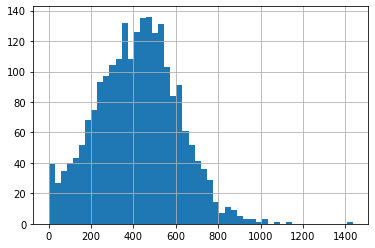

In [42]:
sum_smart['minutes'].hist(bins=50)

- Видим, что большинство пользователей тратят почти что 500 сообщений в месяц, как положенно в тарифе.
- Но так же есть те кто кому нужно побольше и уже платят как сверх тариф

<AxesSubplot:>

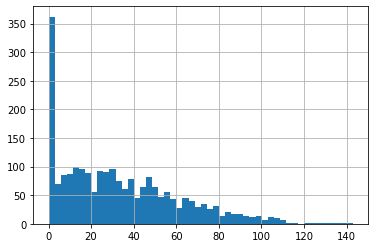

In [43]:
sum_smart['messages'].hist(bins=50)

- Пиковая отправка сообщений 30, что входит в тариф
- Но так же не мало людей, кому нужно отправить 50+ сообщений

<AxesSubplot:>

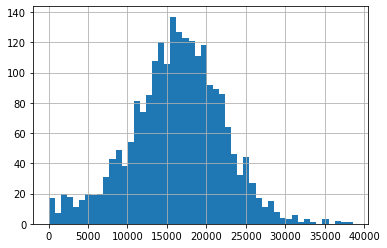

In [44]:
sum_smart['tariffs'].hist(bins=50)

- График говорит, что большиство пользователей не хватает 15гб которые входят в пакет, поэтому им нужено доп.гб

### 3.2 Работаем сначала с тарифом `Ultra`

<AxesSubplot:>

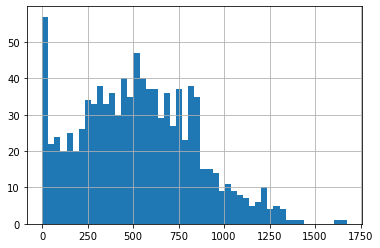

In [45]:
sum_ultra['minutes'].hist(bins=50)

- Пик разговоров составляет примерно 500 минут, пользователям с тарифом ультра хватает включенных минут в тарифе

<AxesSubplot:>

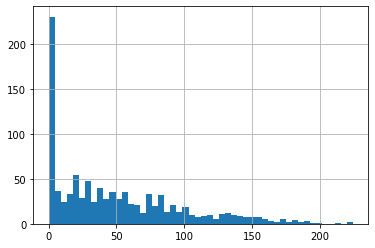

In [46]:
sum_ultra['messages'].hist(bins=50)

- Многие пользователи мало или вовсем не используют сообщения
- Dсем хватает 1000 сообщений в тарифе

<AxesSubplot:>

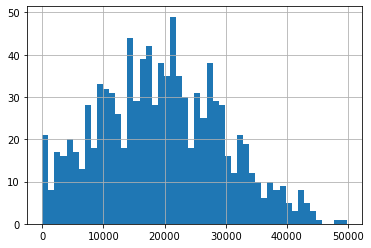

In [47]:
sum_ultra['tariffs'].hist(bins=50)

- Многие даже не все 30гб используют, большинству хватает в районе 15-25гб

### Вывод по работе 3-его шага

- По сути пользователям тарифа `Smart` ничего не хватает из пакетного тарифа, в особенности интернета. Большиснтво докупать доп.гб
- По поводу пользователй тарифа `Ultra`, всем вполне хватает тарифа, но есть исключение которым все же тоже нужны доп.гб
- Сравнение этих двух тарифов: по сообщениям в `Ultra` меньше пользуются чем в `Smart`, пики по использованию итернетом у обоих тарифов примерно одинаковы. 

## Шаг 4. Проверьте гипотезы
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

    Пороговое значение alpha задайте самостоятельно.
    
    Поясните:


- как вы формулировали нулевую и альтернативную гипотезы;
- какой критерий использовали для проверки гипотез и почему.


Сформируем нулевую гипотезу - средняя выручка пользователей тарифов «Ультра» и «Смарт» равна.

Альтернативная гипотеза - средняя выручка пользователей тарифов «Ультра» и «Смарт» различна.

Для проверки гипотезы используем scipy.stats.ttest_ind, так как имеем две независимые генеральные совокупности.

In [48]:
# средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;

smart = sum_smart['earn']
ultra = sum_ultra['earn']

print(pd.Series(smart).mean(), ': Среднее значение тарифа "Smart" ')
print(pd.Series(ultra).mean(), ': Среднее значение тарифа "Ultra" ')

# Критический уровень статистической значимости 
# Если p-value окажется меньше него - отвергнем гипотезу
alpha = .05
results = st.ttest_ind(ultra, smart)

print('p-значение:', results.pvalue)

if results.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1289.6417040358745 : Среднее значение тарифа "Smart" 
2070.030425963489 : Среднее значение тарифа "Ultra" 
p-значение: 8.081909555489933e-161
Отвергаем нулевую гипотезу


Для проверки гипотезы создадим две соответствующие таблицы moscow и other_city. В обеих таблицах будут пользователи обоих тарифов, нужно проверить, чтобы их соотношение в обеих таблицах было примерно одинаково, иначе придётся проверять гипотезу не по 2, а по 4 выборкам - Москва - смарт, Москва - ультра, не Москва - смарт, не Москва - ультра.

Критический уровень значимости поставим 0.05.

In [49]:
# средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

# Переменная чисто для Москвы
moscow = final_table[(final_table['city'] == 'Москва')]
# Переменная для других городов, кроме Москвы
other_city = final_table[(final_table['city'] != 'Москва')]

msc = moscow['earn']
other = other_city['earn']

print(pd.Series(msc).mean(), '- Среднее значение для Москвы ')
print(pd.Series(other).mean(), '- Среднее значение для других городов, кроме Москвы ')

# Критический уровень статистической значимости 
# Если p-value окажется меньше него - отвергнем гипотезу
alpha = .05
results = st.ttest_ind(
    msc,
    other)

print('p-значение:', results.pvalue)

if results.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1546.7135842880523 - Среднее значение для Москвы 
1524.7251439539348 - Среднее значение для других городов, кроме Москвы 
p-значение: 0.5400751614511182
Не получилось отвергнуть нулевую гипотезу


In [50]:
# Выручка Смарта/Ультра и из Москвы/других городов

# Для Москвы
moscow_smart = final_table[(final_table['city']=='Москва')&(final_table['tariff_name'] == 'smart')]
# Для других городов
other_city_smart = final_table[(final_table['city']!='Москва')&(final_table['tariff_name'] == 'smart')]

msc = moscow_smart['earn']
other = other_city_smart['earn']

print(pd.Series(msc).mean(), '- Среднее значение для Москвы ')
print(pd.Series(other).mean(), '- Среднее значение для других городов, кроме Москвы ')

# Критический уровень статистической значимости 
# Если p-value окажется меньше него - отвергнем гипотезу
alpha = .05
results = st.ttest_ind(
    msc,
    other)

print('p-значение:', results.pvalue)

if results.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


1239.3575129533679 - Среднее значение для Москвы 
1300.1675704989154 - Среднее значение для других городов, кроме Москвы 
p-значение: 0.18439170052928663
Не получилось отвергнуть нулевую гипотезу


In [51]:
# Выручка Смарта/Ультра и из Москвы/других городов

# Для Москвы
moscow_ultra = final_table[(final_table['city']=='Москва')&(final_table['tariff_name'] == 'ultra')]
# Для других городов
other_city_ultra = final_table[(final_table['city']!='Москва')&(final_table['tariff_name'] == 'ultra')]

msc = moscow_ultra['earn']
other = other_city_ultra['earn']

print(pd.Series(msc).mean(), '- Среднее значение для Москвы ')
print(pd.Series(other).mean(), '- Среднее значение для других городов, кроме Москвы ')

# Критический уровень статистической значимости 
# Если p-value окажется меньше него - отвергнем гипотезу
alpha = .05
results = st.ttest_ind(
    msc,
    other)

print('p-значение:', results.pvalue)

if results.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

2074.0 - Среднее значение для Москвы 
2068.856767411301 - Среднее значение для других городов, кроме Москвы 
p-значение: 0.8570628563121834
Не получилось отвергнуть нулевую гипотезу


### Вывод по гипотизам 

- Средняя выручка пользователей тарифов Ультра и Смарт различаются и это доказанно, довольной ильно различается
- А вот средняя выручка Москвы и других городов, не сильно отличается, практическе равны
- Результаты статистических тестов не подтверждают (и не доказывают) гипотезы.